## Outliers 


The following plot shows outliers in our wine data continuous numerical fields. Boxes denote the inter-quartile range, the green line therein denotes the mean and whiskers denote points 1.5-times the inter-quartile size outside of the range. Data have been normalised to a [0,1] range so that feature distributions are comparable.  This plot shows some extreme outliers which may result in overfitting problems with some of our models.

#### Import required libraries

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


#### Load dataset

In [ ]:
wine_data = pd.read_csv('winequalityN.csv')

#### Define functions

In [31]:
def min_max_scaler(data, fields):
    # Scales numerical data into a range [0,1]
    
    # Inputs: 
    #    data:   Pandas dataframe containing dataset 
    #    fields: Fields to scale
    
    # Returns: Updated dataset
    
    scaled = pd.DataFrame(MinMaxScaler().fit_transform(data[fields]))
    scaled.columns = fields
    data = data.drop(columns=fields, axis=1)
    data = pd.concat([scaled, data], axis=1)
    data = data.reset_index(drop=True)
    return data    

In [32]:
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [33]:
target_col = ['quality']
continuous_cols = [i for i in wine_data.columns if i not in ['type', 'quality']]

In [34]:
wine_data_normalised = min_max_scaler(wine_data, continuous_cols)

#### Generate plot

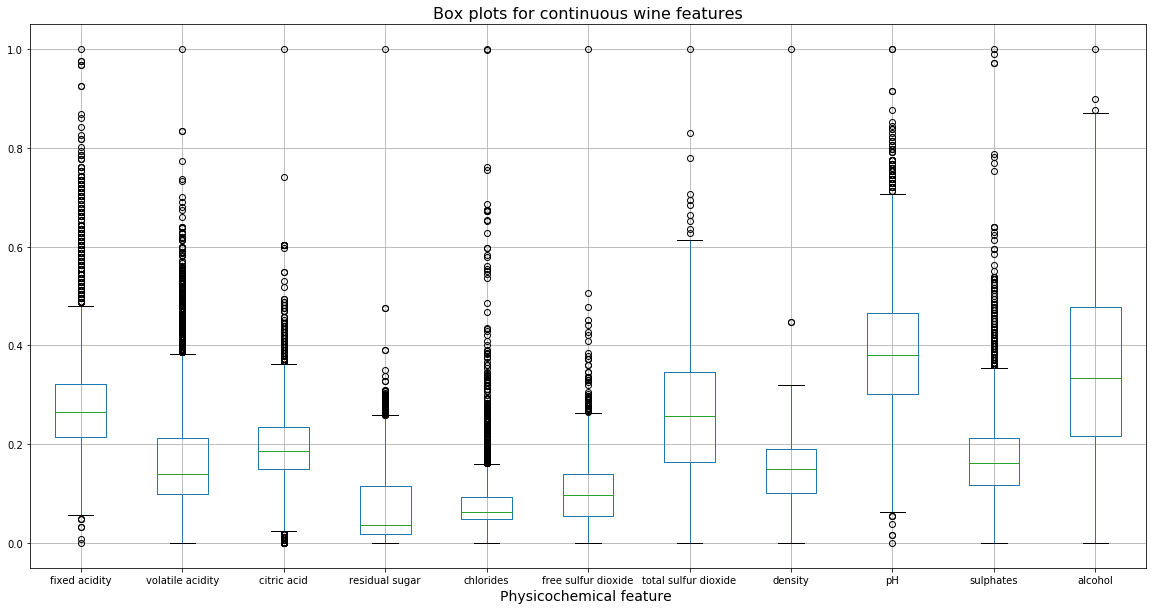

In [49]:
fig, ax = plt.subplots(figsize=(20,10))
plt.title('Box plots for continuous wine features', size=16)
ax.set_xlabel("Physicochemical feature ", size=14)
wine_data_normalised[continuous_cols].boxplot(whis=1.5)